<a href="https://colab.research.google.com/github/wcolwellcol/FinTechCourseWork/blob/main/CribPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Upload cleaned csvs to Colab
from google.colab import files

csv_file = files.upload()

Saving bos_housing_prices.csv to bos_housing_prices (2).csv
Saving chi_housing_prices.csv to chi_housing_prices (2).csv
Saving clean_interest_rates.csv to clean_interest_rates (1).csv
Saving hou_housing_prices.csv to hou_housing_prices (2).csv
Saving lax_housing_prices.csv to lax_housing_prices (2).csv
Saving MHI_clean.csv to MHI_clean (1).csv
Saving mia_housing_prices.csv to mia_housing_prices (2).csv
Saving nyc_housing_prices.csv to nyc_housing_prices (2).csv
Saving pho_housing_prices.csv to pho_housing_prices (2).csv
Saving sea_housing_prices.csv to sea_housing_prices (2).csv
Saving unemployment_cleaned.csv to unemployment_cleaned (1).csv
Saving vix_lumber_spy.csv to vix_lumber_spy (1).csv


In [3]:
#read cleaned csvs into dataframes
vix_lumber_spy_df = pd.read_csv('vix_lumber_spy.csv')
lax_df = pd.read_csv('lax_housing_prices.csv')
MHI_df = pd.read_csv('MHI_clean.csv')
mia_df = pd.read_csv('mia_housing_prices.csv')
nyc_df = pd.read_csv('nyc_housing_prices.csv')
pho_df = pd.read_csv('pho_housing_prices.csv')
sea_df = pd.read_csv('sea_housing_prices.csv')
unemployment_df = pd.read_csv('unemployment_cleaned.csv')
hou_df = pd.read_csv('hou_housing_prices.csv')
rates_df = pd.read_csv('clean_interest_rates.csv')
chi_df = pd.read_csv('chi_housing_prices.csv')
bos_df = pd.read_csv('bos_housing_prices.csv')

In [4]:
#rename DATE and index columns to Date
MHI_df = MHI_df.rename(columns={'DATE': 'Date'})
rates_df = rates_df.rename(columns={'DATE': 'Date'})
unemployment_df = unemployment_df.rename(columns={'DATE': 'Date'})
vix_lumber_spy_df = vix_lumber_spy_df.rename(columns={'index': 'Date'})

In [5]:
#specify the list of dataframes to be merged
dataframes = [vix_lumber_spy_df, lax_df, MHI_df, mia_df, nyc_df, pho_df, sea_df, unemployment_df, hou_df, rates_df, chi_df, bos_df]

#merge the dataframes using the 'outer' join method
cribpredict_df = dataframes[0]

#iterate over the remaining dataframes and merge them with the 'left'
for df in dataframes[1:]:
    cribpredict_df = pd.merge(cribpredict_df, df, on=['Date'], how='outer')

#display the merged dataframe
cribpredict_df.tail()


,Date,VIX,Lumber,SPY,Los Angeles,MIA_MHI,BOS_MHI,PHO_MHI,NY_MHI,SEA_MHI,...,NY_UR,SEA_UR,LA_UR,HOU_UR,CHI_UR,Houston,DFF,MORTGAGE30US,Chicago,Boston
398,1996-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,4.5,6.9,5.4,4.9,NaN,NaN,NaN,NaN,NaN
399,1996-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,4.3,6.9,5.0,4.7,NaN,NaN,NaN,NaN,NaN
400,1996-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.3,4.4,6.8,5.4,4.6,NaN,NaN,NaN,NaN,NaN
401,1996-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.3,4.1,6.7,5.2,4.9,NaN,NaN,NaN,NaN,NaN
402,1996-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3,4.6,6.7,5.9,5.7,NaN,NaN,NaN,NaN,NaN


In [6]:
#check data types
cribpredict_df.dtypes

Date             object
VIX             float64
Lumber          float64
SPY             float64
Los Angeles     float64
MIA_MHI         float64
BOS_MHI         float64
PHO_MHI         float64
NY_MHI          float64
SEA_MHI         float64
LA_MHI          float64
HOU_MHI         float64
CHI_MHI         float64
Miami           float64
New York        float64
Phoenix         float64
Seattle         float64
MIA_UR          float64
BOS_UR          float64
PHO_UR          float64
NY_UR           float64
SEA_UR          float64
LA_UR           float64
HOU_UR          float64
CHI_UR          float64
Houston         float64
DFF             float64
MORTGAGE30US    float64
Chicago         float64
Boston          float64
dtype: object

In [7]:
cribpredict_df['Date'] = pd.to_datetime(cribpredict_df['Date'])
cribpredict_df.set_index('Date', inplace=True)
cribpredict_df

,VIX,Lumber,SPY,Los Angeles,MIA_MHI,BOS_MHI,PHO_MHI,NY_MHI,SEA_MHI,LA_MHI,...,NY_UR,SEA_UR,LA_UR,HOU_UR,CHI_UR,Houston,DFF,MORTGAGE30US,Chicago,Boston
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-01,22.718261,333.900000,150.375000,NaN,33228.0,28914.0,33123.5,30888.25,39505.0,32297.5,...,4.1,3.8,5.1,4.1,4.2,NaN,5.853548,8.2400,NaN,NaN
2000-04-01,27.098500,311.249474,146.231911,NaN,33228.0,28914.0,33123.5,30888.25,39505.0,32297.5,...,4.3,4.1,5.1,4.4,4.2,NaN,6.019667,8.1525,NaN,NaN
2000-05-01,26.290435,291.777273,142.080250,NaN,33228.0,28914.0,33123.5,30888.25,39505.0,32297.5,...,4.2,4.3,5.0,4.7,4.7,NaN,6.268065,8.5150,NaN,NaN
2000-06-01,21.540000,288.352727,146.521318,NaN,33228.0,28914.0,33123.5,30888.25,39505.0,32297.5,...,4.6,4.4,5.0,4.6,4.6,NaN,6.528333,8.2880,NaN,NaN
2000-07-01,19.890000,258.655000,147.503905,NaN,33228.0,28914.0,33123.5,30888.25,39505.0,32297.5,...,4.5,4.4,4.9,4.6,4.3,NaN,6.544516,8.1475,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,4.5,6.9,5.4,4.9,NaN,NaN,NaN,NaN,NaN
1996-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,4.3,6.9,5.0,4.7,NaN,NaN,NaN,NaN,NaN
1996-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.3,4.4,6.8,5.4,4.6,NaN,NaN,NaN,NaN,NaN


In [8]:
###WILL STUFF
cribpredict_df = cribpredict_df.copy().dropna()

In [9]:
cribpredict_df.columns

Index(['VIX', 'Lumber', 'SPY', 'Los Angeles', 'MIA_MHI', 'BOS_MHI', 'PHO_MHI',
       'NY_MHI', 'SEA_MHI', 'LA_MHI', 'HOU_MHI', 'CHI_MHI', 'Miami',
       'New York', 'Phoenix', 'Seattle', 'MIA_UR', 'BOS_UR', 'PHO_UR', 'NY_UR',
       'SEA_UR', 'LA_UR', 'HOU_UR', 'CHI_UR', 'Houston', 'DFF', 'MORTGAGE30US',
       'Chicago', 'Boston'],
      dtype='object')

In [10]:
###LA
LAX = cribpredict_df[['VIX', 'Lumber', 'SPY','Los Angeles','LA_MHI','DFF','MORTGAGE30US','LA_UR']]

In [45]:
df

,VIX,Lumber,SPY,Los Angeles,LA_MHI,DFF,MORTGAGE30US,LA_UR
Date,,,,,,,,
2008-04-01,21.562727,224.794545,136.995455,499583.0,42045.0,2.278333,5.9175,6.4
2008-05-01,18.360000,247.995000,140.470476,495250.0,42045.0,1.978387,6.0360,6.7
2008-06-01,22.110476,245.786000,134.258095,490833.0,42045.0,2.001000,6.3200,7.0
2008-07-01,24.343043,251.966667,125.630909,480833.0,42045.0,2.009677,6.4260,7.4
2008-08-01,20.695714,259.345714,128.361429,467500.0,42045.0,1.996452,6.4775,7.7
...,...,...,...,...,...,...,...,...
2021-08-01,17.472727,510.672727,444.520000,823333.0,54443.0,0.092258,2.8425,7.2
2021-09-01,19.669545,608.527273,443.553810,822167.0,54443.0,0.079333,2.9000,6.7
2021-10-01,17.871429,688.247619,444.725238,823000.0,54443.0,0.079032,3.0675,6.3


In [46]:
df = LAX

In [47]:
n = len(df)
train_df = df[0:int(n*0.7)]
test_df = df[int(n*0.7):int(n)]

In [48]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('Los Angeles')
test_labels = test_features.pop('Los Angeles')

In [49]:
#illustrate the need to normalize the data
train_df.describe().transpose()[['mean', 'std']]

,mean,std
VIX,20.073945,9.691371
Lumber,282.944120,60.723731
SPY,160.316326,47.238241
Los Angeles,456315.478261,70899.802264
LA_MHI,47309.034783,5597.280066
DFF,0.336838,0.472162
MORTGAGE30US,4.319565,0.725770
LA_UR,8.546957,2.640153


In [52]:
#normalize
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [53]:
#show outputs of normalizing
print(normalizer.mean.numpy())

[[2.0073942e+01 2.8294412e+02 1.6031633e+02 4.7309031e+04 3.3683836e-01
  4.3195648e+00 8.5469551e+00]]


In [54]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [55]:
linear_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 7)                15        
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 23
Trainable params: 8
Non-trainable params: 15
_________________________________________________________________


In [56]:
linear_model.layers[1].kernel

<tf.Variable 'dense_5/kernel:0' shape=(7, 1) dtype=float32, numpy=
array([[ 0.51222664],
       [-0.25173187],
       [ 0.74194497],
       [ 0.2937593 ],
       [-0.3140465 ],
       [-0.22754997],
       [ 0.0793758 ]], dtype=float32)>

In [57]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [58]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.9 s, sys: 129 ms, total: 4.03 s
Wall time: 3.97 s


In [59]:

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([)
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [60]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,430329.87500,560116.2500,95
96,430329.03125,560117.7500,96
97,430328.31250,560119.1875,97
98,430327.56250,560120.8125,98
99,430326.81250,560122.1875,99


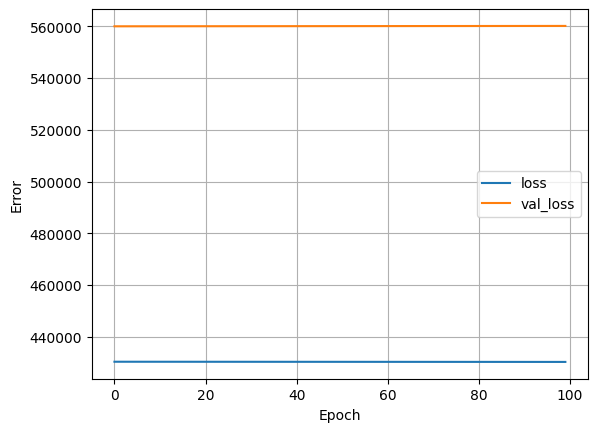

In [61]:
plot_loss(history)

In [62]:
test_results = {}

In [65]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [66]:
test_results

{'linear_model': 680997.375}

In [72]:
linear_model_2 = tf.keras.Sequential()

In [73]:
number_input_features = 7
hidden_nodes_layer1 =  6
hidden_nodes_layer2 =  3

In [74]:
linear_model_2.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
linear_model_2.add(Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="relu"))
linear_model_2.add(Dense(units=1, activation="relu"))

In [75]:
linear_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics=['mse'])

In [76]:
model = linear_model_2.fit(train_features,
    train_labels,
    verbose=0, epochs=25)

In [77]:
 model_loss, model_mse = linear_model_2.evaluate(test_features, test_labels, verbose=2)

2/2 - 0s - loss: 161273.7031 - mse: 30264944640.0000 - 128ms/epoch - 64ms/step


2/2 [==============================] - 0s 4ms/step


Text(0, 0.5, 'Predictions [Price]')

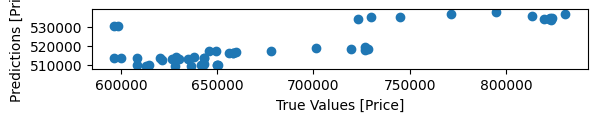

In [78]:
test_predictions = linear_model_2.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
# lims = [0, 50]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims, lims)

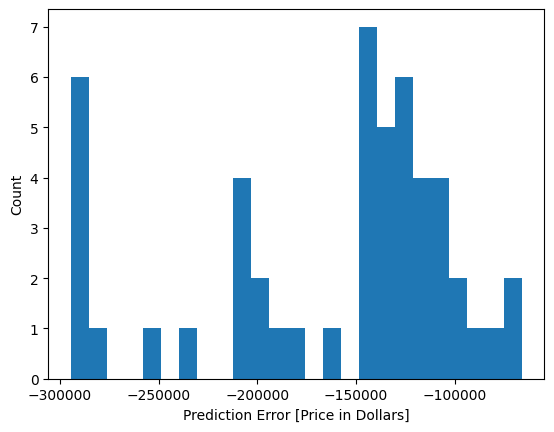

In [79]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Price in Dollars]')
_ = plt.ylabel('Count')

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)